<a href="https://colab.research.google.com/github/camilla8989/pythonstudy/blob/house-price-prediction/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Analysis

## 1.1 Price Distribution
Analysis the price data qualitatively through statistical description and histograms to discover the price distribution. 

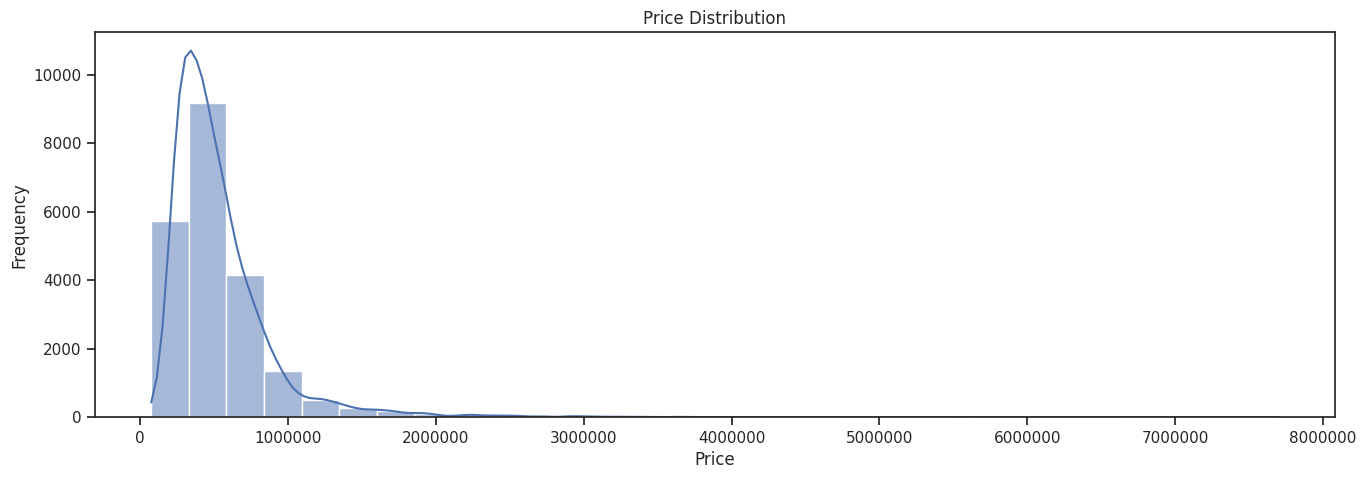

Price Information:
count     21613.00
mean     540182.16
std      367362.23
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64
Kurtosis: 34.522444410072566
Skewness: 4.021715573048684


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv("house_dataset.csv")

# Set the number of decimal places displayed
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# plot histogram
plt.figure(figsize=(16, 5))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='x')  
plt.show()

# print price info
print("Price Information:")
print(df['price'].describe())

# comput kurtosis & skewness
kurtosis = df['price'].kurtosis()
skewness = df['price'].skew()

# print kurtosis & skewness
print("Kurtosis:", kurtosis)
print("Skewness:", skewness)


## 1.2 Correlation analysis between features and target value
Using PCA, find the features that have the impact on price. Since typically correlation coefficients with absolute values less than 0.3 indicate no correlation,the features with correlation coefficients greater than 0.3 will be kept. 

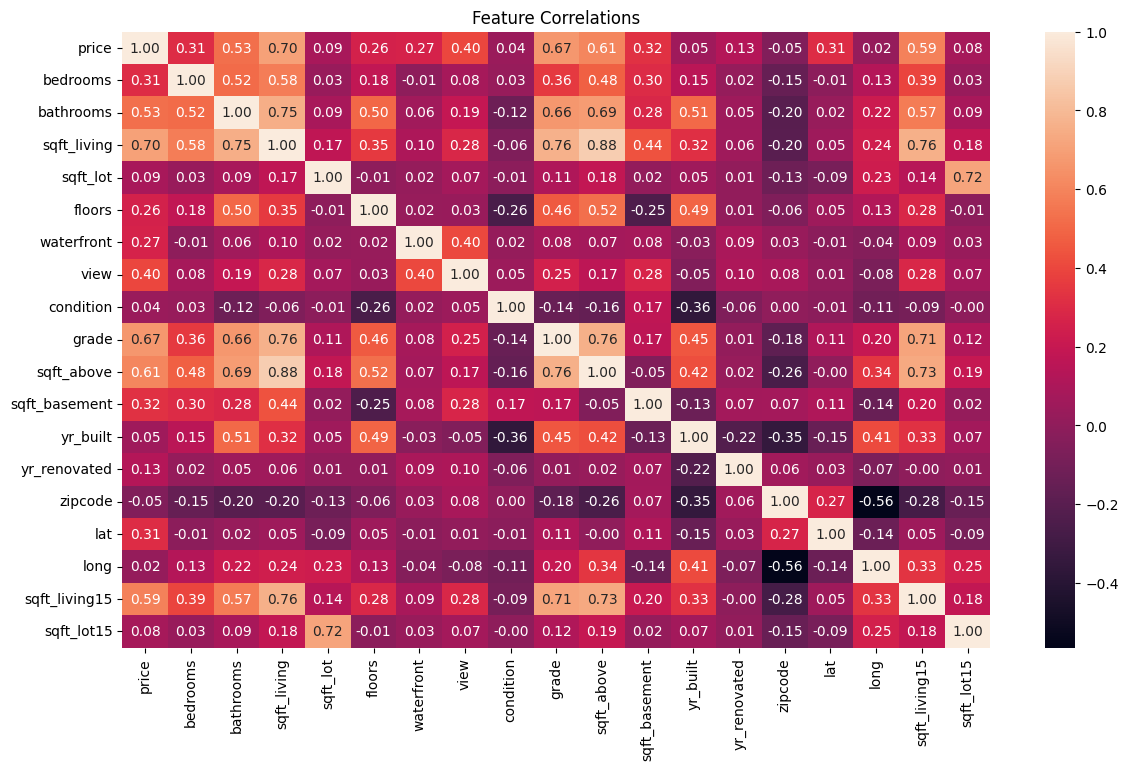

Features ranked by absolute correlation with price:
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
zipcode          0.053168
condition        0.036392
long             0.021571
Name: price, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Drop 'id' and 'date' columns
df = df.drop(['id', 'date'], axis=1)

# Extract features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute Pearson correlation coefficients between each feature and the target variable
correlations = df.corr()['price'].drop('price')

# Plot heatmap of feature correlations with price
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# Print features in descending order of absolute correlation with price
print("Features ranked by absolute correlation with price:")
print(correlations.abs().sort_values(ascending=False))


## 1.3 Correlation among Features
Correlation analysis among the selected features using the correlation coefficient matrix. The purpose of this analysis was to identify highly correlated features to avoid multicollinearity issues during model training.

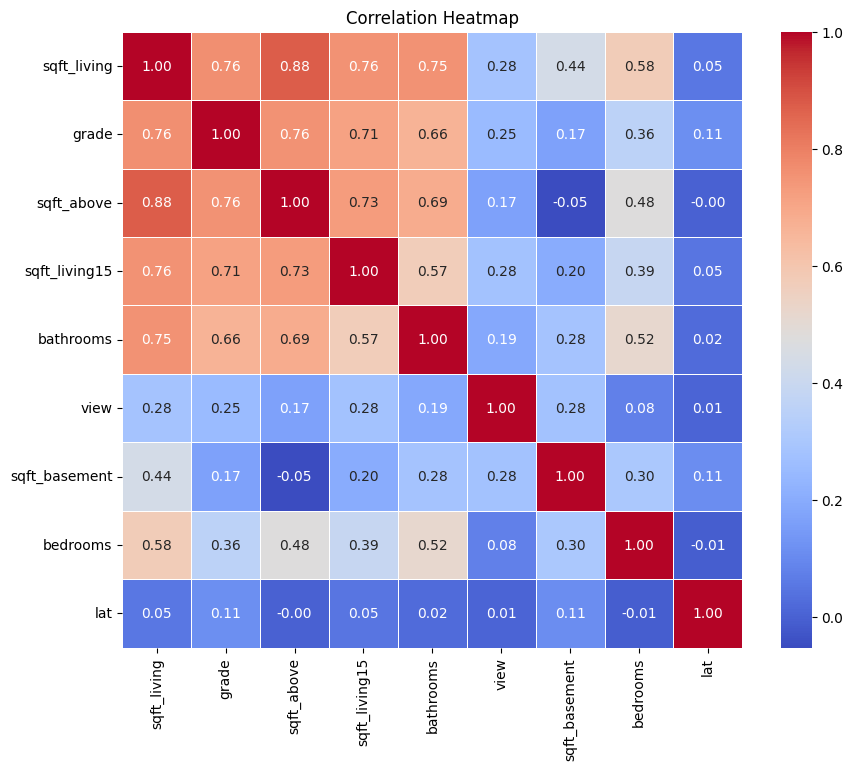

Correlation values:
Correlated features for 'sqft_living': grade, sqft_above, sqft_living15, bathrooms, bedrooms
Correlated features for 'grade': sqft_living, sqft_above, sqft_living15, bathrooms
Correlated features for 'sqft_above': sqft_living, grade, sqft_living15, bathrooms
Correlated features for 'sqft_living15': sqft_living, grade, sqft_above, bathrooms
Correlated features for 'bathrooms': sqft_living, grade, sqft_above, sqft_living15, bedrooms
Correlated features for 'bedrooms': sqft_living, bathrooms


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Remove 'id', 'date', 'price' columns
df_filtered = df.drop(['id', 'date', 'price'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered)

# Create a DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_filtered.columns)

# Select specific features for correlation analysis
selected_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']

# Perform correlation analysis
corr_matrix = df_scaled[selected_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Print correlation values
print("Correlation values:")
for feature in corr_matrix.columns:
    correlated_features = corr_matrix[corr_matrix[feature] > 0.5].index.tolist()
    correlated_features.remove(feature)
    if correlated_features:
        print(f"Correlated features for '{feature}': {', '.join(correlated_features)}")


# 2. Traning Models 

## 2.1 Tensorflow models

1. Data Processing. Includes removal of nulls, outliers, and data normalization.
2. Use TensorFlow to build three models:
* Model 1 (3 layers):
  * Input layer: activation function ReLu, 64 neurons
  * idden layer: activation function ReLu, 64 neurons
  * Output layer: activation function linear

* Mdel 2 (3 layers):
  * Input layer: activation function ReLu, 64 neurons
  * Hidden layer: activation function Sigmod, 64 neurons
  * Output layer: activation function linear

* Mdel 3 (4 layers):
  * Input layer: activation function ReLu, 64 neurons
  * Hidden layer: activation function ReLu, 64 neurons
  * Hidden layer: activation function ReLu, 32 neurons
  * Output layer: activation function linear

### 2.1.1 Model 1

Epoch 1/100
411/411 [==============================] - 3s 4ms/step - loss: 142023688192.0000 - mean_squared_error: 142023688192.0000 - mean_absolute_error: 310939.2500 - val_loss: 40862978048.0000 - val_mean_squared_error: 40862978048.0000 - val_mean_absolute_error: 159155.5469
Epoch 2/100
411/411 [==============================] - 1s 3ms/step - loss: 28100141056.0000 - mean_squared_error: 28100141056.0000 - mean_absolute_error: 128356.1406 - val_loss: 19943624704.0000 - val_mean_squared_error: 19943624704.0000 - val_mean_absolute_error: 105351.2656
Epoch 3/100
411/411 [==============================] - 1s 3ms/step - loss: 16764293120.0000 - mean_squared_error: 16764293120.0000 - mean_absolute_error: 96624.8516 - val_loss: 17214398464.0000 - val_mean_squared_error: 17214398464.0000 - val_mean_absolute_error: 98223.8047
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 15670088704.0000 - mean_squared_error: 15670088704.0000 - mean_absolute_error: 93459.2969 - va

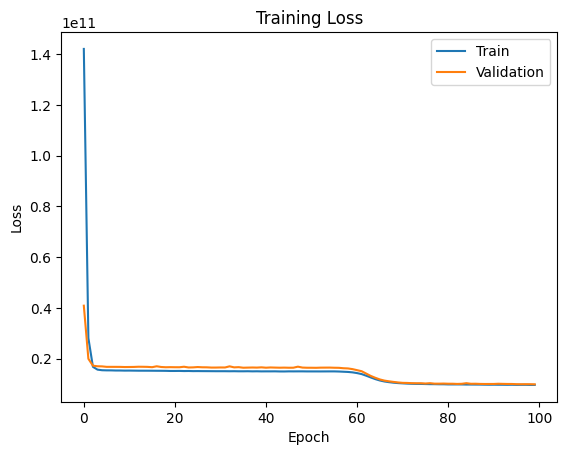

129/129 [==============================] - 0s 2ms/step
MSE: 9786976681.985313
R^2: 0.777814142042718


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# read dataset
df = pd.read_csv('house_dataset.csv')

# Sort by price
df = df.sort_values('price')

# Calculate the number of samples to remove
remove_samples = int(len(df) * 0.05)

# Remove the 5% samples with the highest price
df = df.iloc[:-remove_samples]

# select main features
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# Handling Missing or Outliers
df = df.dropna()  
df = df[df['price'] > 0]  

# Extract features and target variables
X = df[features]
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# Define the EarlyStopping callback function
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# training model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Plot training error line graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Use the trained model to make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print results
print("MSE:", mse)
print("R^2:", r2)


### 2.1.2 Model 2

Epoch 1/100
411/411 [==============================] - 2s 4ms/step - loss: 272353280000.0000 - mean_squared_error: 272353280000.0000 - mean_absolute_error: 477377.3125 - val_loss: 281663340544.0000 - val_mean_squared_error: 281663340544.0000 - val_mean_absolute_error: 484790.3750
Epoch 2/100
411/411 [==============================] - 2s 4ms/step - loss: 272246407168.0000 - mean_squared_error: 272246407168.0000 - mean_absolute_error: 477265.1250 - val_loss: 281557598208.0000 - val_mean_squared_error: 281557598208.0000 - val_mean_absolute_error: 484681.1875
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 272142893056.0000 - mean_squared_error: 272142893056.0000 - mean_absolute_error: 477157.0625 - val_loss: 281453166592.0000 - val_mean_squared_error: 281453166592.0000 - val_mean_absolute_error: 484573.5938
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 272040738816.0000 - mean_squared_error: 272040738816.0000 - mean_absolute_error: 4

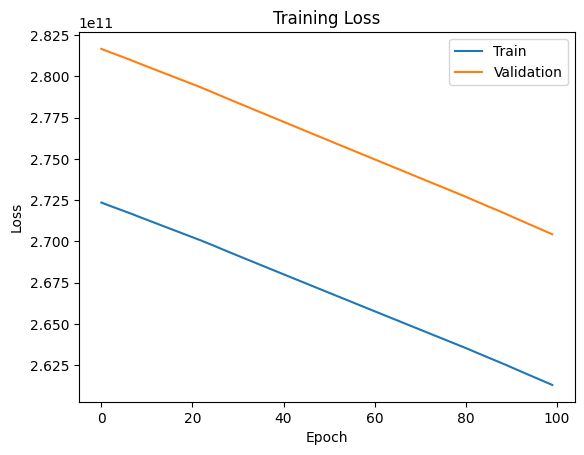

129/129 [==============================] - 0s 2ms/step
MSE: 263290435440.25247
R^2: -4.9772709378083535


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Read dataset
df = pd.read_csv('house_dataset.csv')

# Sort by price
df = df.sort_values('price')

# Calculate the number of samples to remove
remove_samples = int(len(df) * 0.05)

# Remove the 5% samples with the highest price
df = df.iloc[:-remove_samples]

# select main features
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# Handling Missing or Outliers
df = df.dropna() 
df = df[df['price'] > 0]  

# Extract features and target variables
X = df[features]
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# Define the EarlyStopping callback function
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# Traning Model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Plot training error line graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Use the trained model to make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print result
print("MSE:", mse)
print("R^2:", r2)


### 2.1.3 Model 3

Epoch 1/100
411/411 [==============================] - 4s 4ms/step - loss: 66733412352.0000 - mean_squared_error: 66733412352.0000 - mean_absolute_error: 180868.8281 - val_loss: 17574799360.0000 - val_mean_squared_error: 17574799360.0000 - val_mean_absolute_error: 98454.3672
Epoch 2/100
411/411 [==============================] - 2s 5ms/step - loss: 15755624448.0000 - mean_squared_error: 15755624448.0000 - mean_absolute_error: 93331.6172 - val_loss: 16973454336.0000 - val_mean_squared_error: 16973454336.0000 - val_mean_absolute_error: 96827.1250
Epoch 3/100
411/411 [==============================] - 2s 4ms/step - loss: 15585135616.0000 - mean_squared_error: 15585135616.0000 - mean_absolute_error: 92866.5234 - val_loss: 16850902016.0000 - val_mean_squared_error: 16850902016.0000 - val_mean_absolute_error: 96275.2031
Epoch 4/100
411/411 [==============================] - 1s 4ms/step - loss: 15459530752.0000 - mean_squared_error: 15459530752.0000 - mean_absolute_error: 92306.1250 - val_los

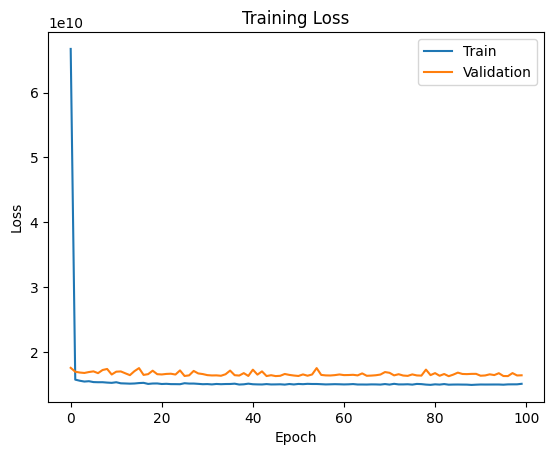

129/129 [==============================] - 0s 2ms/step
MSE: 15455265607.859732
R^2: 0.6491315387150383


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Read dataset
df = pd.read_csv('house_dataset.csv')

# Sort by price
df = df.sort_values('price')

# Calculate the number of samples to remove
remove_samples = int(len(df) * 0.05)

# Remove the 5% samples with the highest price
df = df.iloc[:-remove_samples]

# Select main features
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# Handling Missing or Outliers
df = df.dropna()  
df = df[df['price'] > 0]  

# Extract features and target variables
X = df[features]
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

# Define the EarlyStopping callback function
early_stopping = EarlyStopping(patience=50, restore_best_weights=True)

# training model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Plot training error line graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Use the trained model to make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print result
print("MSE:", mse)
print("R^2:", r2)


## 2.2 Comparison conclusion of TensorFlow three models
By comparing the performance of these three models, we can see that the first model had a lower MSE and a higher R^2, indicating better predictive performance. However, in the second and third models, we observed some issues such as high MSE and lower R^2, which could be attributed to inadequate model structures or parameter adjustments.

In conclusion, based on the evaluation metrics and error plots, the first model performed the best in this task, with lower MSE, higher R^2, and overlapping error lines of the training and validation sets. However, we can still explore other model structures and parameter adjustments to further optimize the model's performance.

## 2.3 Random Forest Model
This model uses the RandomForestRegressor library to realize the construction of the regression model. Define the hyperparameter space of the random forest regression model. A grid search is then performed to exhaustively search for the best combination of hyperparameters. Calculate the mean squared error (MSE) for each combination and generate a plot to visualize the relationship between hyperparameters and MSE.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

ValueError: ignored

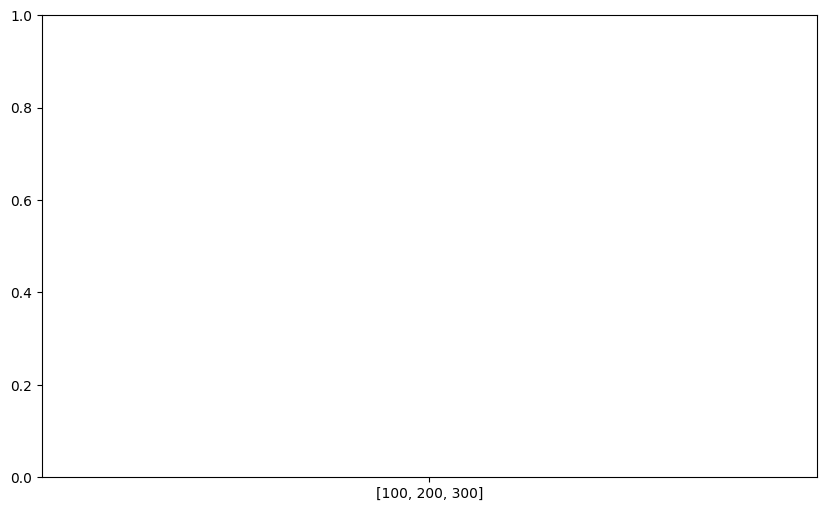

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read data
df = pd.read_csv('house_dataset.csv')

# Calculate the number of samples to remove
remove_samples = int(len(df) * 0.05)

# Remove the 5% samples with the highest price
df = df.iloc[:-remove_samples]

# Removing Missing or Outliers
df = df.dropna()  
df = df[df['price'] > 0]  

# Choose the main features
features = ['grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat']
target = 'price'

# Extract features and target variables
X = df[features]
y = df[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define Random Forest Regression Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter Tuning Using Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the value range of the hyperparameter
param_values = [str(x) for x in grid_search.cv_results_['params']]

# Extract the mean squared error for each hyperparameter combination
mse_scores = -grid_search.cv_results_['mean_test_score']

# Plot hyperparameters versus mean squared error
plt.figure(figsize=(10, 6))
plt.plot(param_values, mse_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the optimal hyperparameters
print("Optimal Hyperparameters:", grid_search.best_params_)

# Make predictions using models with optimized hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print assessment results
print("MSE:", mse)
print("R^2:", r2)


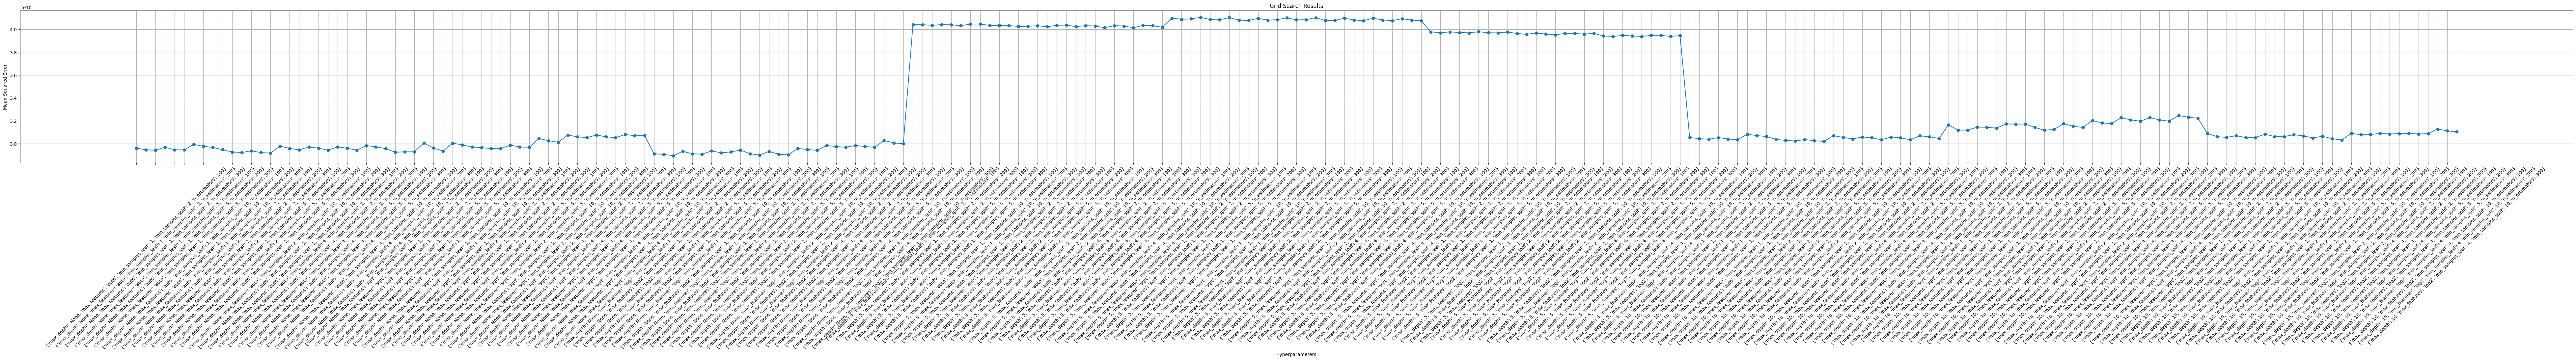

In [ ]:
# Get the value range of the hyperparameter
param_values = [str(x) for x in grid_search.cv_results_['params']]

# Extract the mean squared error for each hyperparameter combination
mse_scores = -grid_search.cv_results_['mean_test_score']

# Plot hyperparameters versus mean squared error
plt.figure(figsize=(100, 6))
plt.plot(param_values, mse_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Print the optimal hyperparameters
print("Optimal Hyperparameters:", grid_search.best_params_)

# Make predictions using models with optimized hyperparameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print assessment results
print("MSE:", mse)
print("R^2:", r2)

Optimal Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 27211002828.99091
R^2: 0.7934162624435928


##2.4 Comparison conclusion of TensorFlow model and random forest model
According to the results given, the model built by TensorFlow has a lower mean square error (MSE) of 9786976681.985313 and a higher coefficient of determination (R^2) of 0.777814142042718. This means that the error between the model's predicted value and the actual value is small, and the model can explain 77.78% of the variance of the target variable.

On the other hand, the model built by random forest has a higher mean square error (MSE) of 27211002828.99091 and a slightly higher coefficient of determination (R^2) of 0.7934162624435928. This represents a large prediction error for the model, but still explains 79.34% of the variance of the target variable.

# 3. Final Conclusion
In summary, based on the results given, the model built by TensorFlow performed better in terms of mean square error, while the model built by Random Forest was slightly better in terms of coefficient of determination. However, to comprehensively evaluate the performance of the model, other factors need to be considered, such as the complexity of the model, training, and inference speed, etc. The TensorFlow model takes about 2 minutes to run. The model built by random forest needs to find the optimal hyperparameters first. So, it takes a long time, a total of 2 hours. In terms of computational cost, I think the model built by TensorFlow is better.